    1.Distplot
    - histogram
    - kde pdf (probability density function) เซตการกระจายตัว
    - rug ระบุตำแหน่งของข้อมูล
    syn: sns.distplot(df.col, rug=True, hist=False)
    
    2.relplot() ความสัมพันธ์ระหว่างสองตัวแปร
    -col/row
    -kind='line','scatter'
    
    3.catplot() แยกตามหมวดหมู่
    -kind = 'strip'จุด,'swarm','box','violin'
    
    4.multi-plot
    5.FacetGrid
    -pairplot
    6.set_stype,set_context


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## การกระจายตัว (Distribution Plots) : (Displot())
    - seaborn.displot
        - Figure = level
        - 

In [3]:
df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### Histogram 
    - bins = ปรับให้แสดงผลว่ามีกี่กล่อง 
    - height = scale ความสูง
    - aspect = ความกว้างของแท่ง
    - bins=[1,2,3,4,5,6,7,8,9] = ระบุขอบเขตของกล่องว่าแต่ละกล่องมีค่าเท่าไหร่
   

/var/folders/gz/r2x74xbj2tn_9131y1mkcb6m0000gn/T/ipykernel_4905/598391309.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tip,rug=True, hist=False)


<Axes: xlabel='tip', ylabel='Density'>

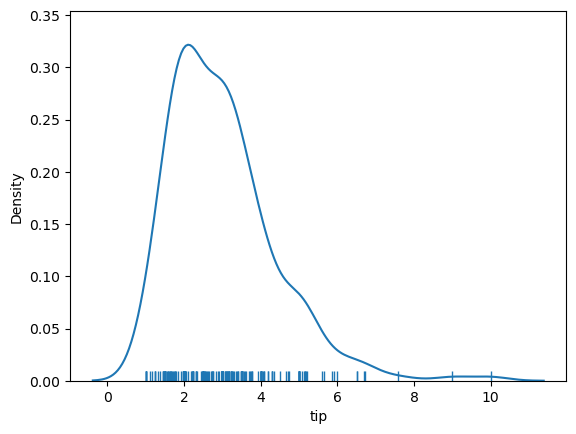

In [5]:
sns.distplot(df.tip,rug=True, hist=False)

/var/folders/gz/r2x74xbj2tn_9131y1mkcb6m0000gn/T/ipykernel_4905/409286477.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tip,rug=True, hist=False,kde=True)


<Axes: xlabel='tip', ylabel='Density'>

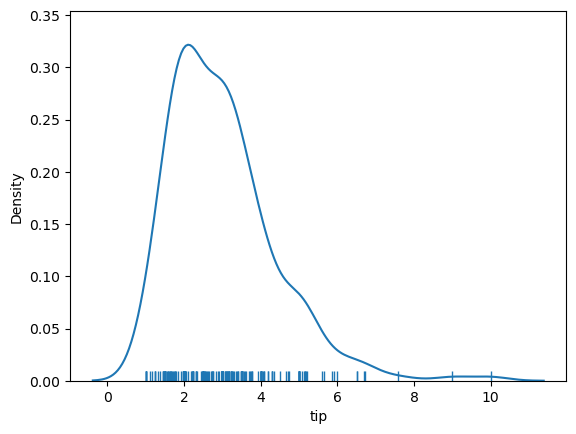

In [8]:
sns.distplot(df.tip,rug=True, hist=False,kde=True)

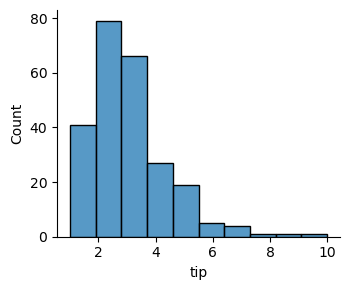

In [6]:
sns.displot(df.tip,bins=10,height=3,aspect=1.2) 
#bins = จากค่าน้อยสุดไปมากสุดแบ่งเป็น 10 กล่อง
#สามารถระบุได้ bins=[1,2,3,4,5,6]

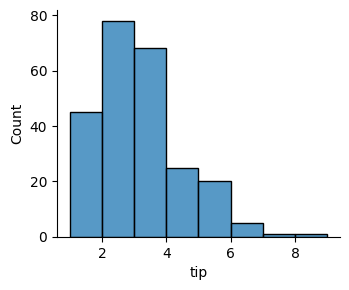

In [15]:
sns.displot(df.tip,bins=[1,2,3,4,5,6,7,8,9],height=3,aspect=1.2) 

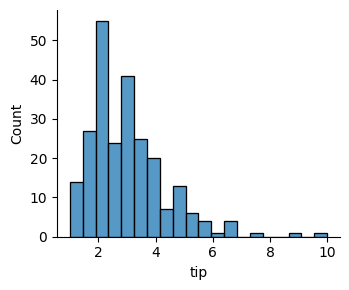

In [16]:
sns.displot(df.tip,bins=20,height=3,aspect=1.2) 

## pdf (probability density function) : histogram มาเปลี่ยนเป็นความน่าจะเป็น
    ทางคณิตศาสตร์ไม่่ชอบการเปลี่ยนไปตาม option ต่างๆ 
    เป็นการเปลี่ยน histogram ให้เป็นแบบเส้น
    Option
        - kind = 'hist' : histogram
        - kind = 'ecdf' : 
        - kind = 'kde' : เปลี่ยนเป็นกราฟเส้น 

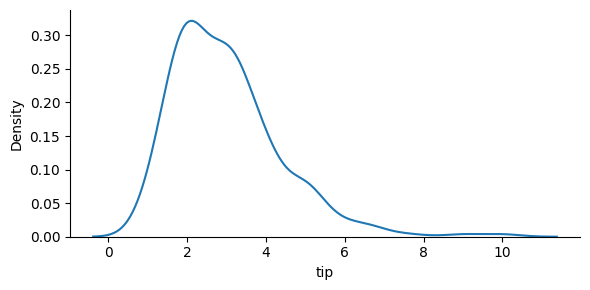

In [21]:
sns.displot(df.tip,kind ='kde',height=3,aspect=2) #kde : kernel density estimation 

### การอ่านข้อมูล 
    มีคนที่ให้ค่า tip =2 ถึง 4 ค่อนข้างเยอะ
    และมีคนให้ค่า tip =10 นิดหน่อย

## ecdf ( empirocal cumulative distribution function )
  

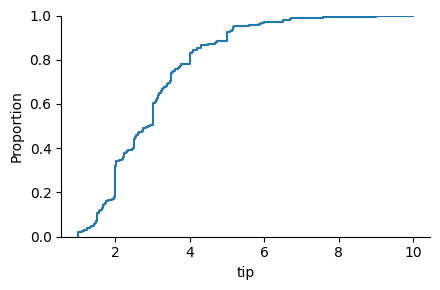

In [22]:
sns.displot(df.tip,kind ='ecdf',height=3,aspect=1.5)

### การอ่านข้อมูลจากกราฟ
    จะเป็นการอ่านค่าสะสม 
    tip = 2 : 1-->2 --> คิดเป็น 20%
    tip = 4 : 1-->4 --> คิดเป็น 80% ของข้อมูลทั้งหมด
    tip = 10 : 1-->10 --> คิดเป็น 100%
    จะเห็นว่าข้อมูลเยอะตรงไหน ตรงไหนที่ชันมาก ข้อมูลจะเยอะ 
    เช่นในช่วงของ tip =2 

## RUG Plot
    - ควบคุมขนาดของภาพได้ลำบากจะระบุ height ไม่ได้ 

<Axes: xlabel='tip'>

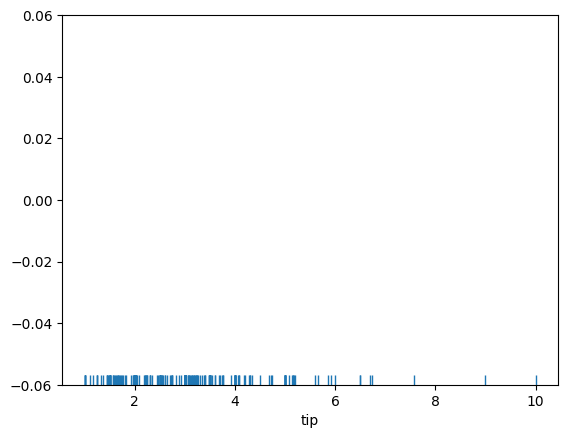

In [25]:
sns.rugplot(df.tip)

### การอ่านข้อมูล rug
    ตรงไหนมีเส้นแน่นๆ แสดงว่าข้อมูลบริเวณนั้นมีการกระจุกตัวอยู่ตรงนั้น

### การซ้อนกราฟ

<Axes: xlabel='tip', ylabel='Count'>

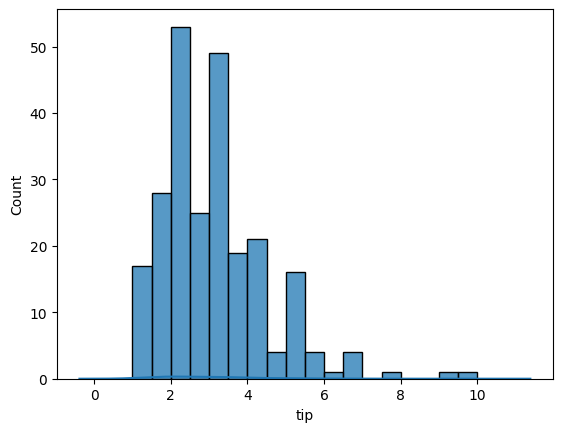

In [27]:
sns.histplot(df.tip)
sns.kdeplot(df.tip)

## การแสดงความสัมพันธ์ของข้อมูล (relplot() )
    - default จะแสดง scatter plot 
    
    seaborn.relplot
        - scatterplot() with kind = "scatter" จุดๆ
            hue แยกสีตาม ... เฉดสีจะแบ่งตามความหนาแน่นของข้อมูล
            colormap โดยใช้ palette : เลือกสี
            style : สัญลักษณ์จุด เช่น จุดวงกลม จุดกากบาท
            
            ข้อแนะนำอย่าใส่ข้อมูลที่เยอะเกินจะทำให้ดูยาก แล้วแต่การใช้งาน
            
        - lineplot() with kind = "line"

### Scatterplot : แสดงความสัมพันธ์สองคอลัมน์ได้ชัดเจน

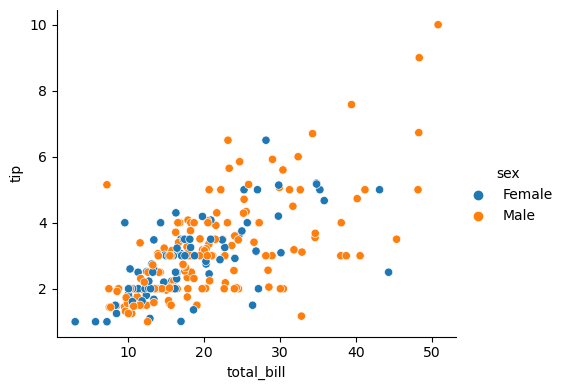

In [9]:
sns.relplot(df, x = 'total_bill',y='tip', #x=ตัวแปรต้น(สาเหตุ) ,y=ตัวแปรตาม(ผล)
            hue = 'sex' ,# hue : แยกสีตาม.. 
            height=4,aspect=1.2)

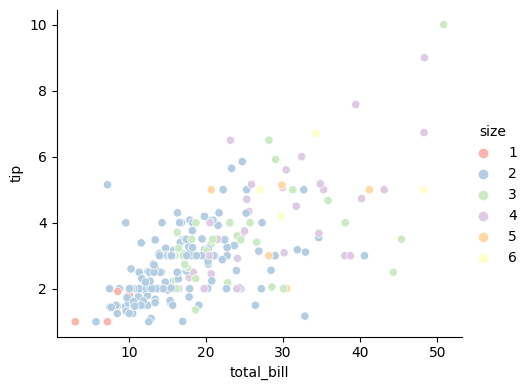

In [35]:
sns.relplot(df, x = 'total_bill',y='tip',
            hue = 'size',palette ='Pastel1'# hue : แยกสีตาม.. 
            ,height=4,aspect=1.2)

/var/folders/gz/r2x74xbj2tn_9131y1mkcb6m0000gn/T/ipykernel_44309/3277592078.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(df, x = 'total_bill',y='tip',


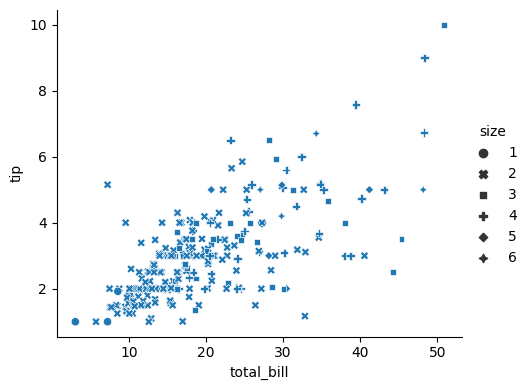

In [38]:
sns.relplot(df, x = 'total_bill',y='tip',
            style = 'size',palette ='Pastel1'# hue : แยกสีตาม.. 
            ,height=4,aspect=1.2)

/var/folders/gz/r2x74xbj2tn_9131y1mkcb6m0000gn/T/ipykernel_44309/2316020243.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(df, x = 'total_bill',y='tip',


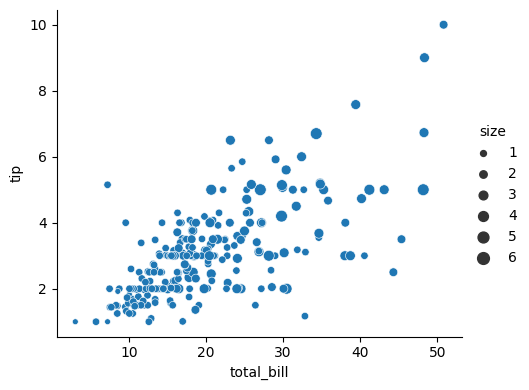

In [39]:
sns.relplot(df, x = 'total_bill',y='tip',
            size = 'size',palette ='Pastel1'# hue : แยกสีตาม.. 
            ,height=4,aspect=1.2)

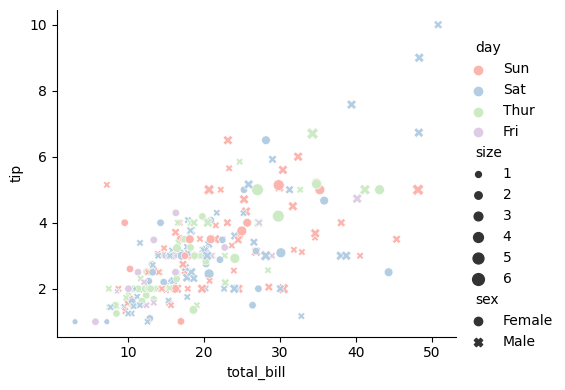

In [40]:
sns.relplot(df, x = 'total_bill',y='tip',
            hue = 'day',style ='sex',size='size',palette ='Pastel1'# hue : แยกสีตาม.. 
            ,height=4,aspect=1.2)

## Col/Row : แยกกราฟเป็นหลายกราฟ
    col : แยกกราฟเป็นซ้ายขวา ด้วยข้อมูล x
    row : แยกกราฟเป็นบนล่าง ด้วยข้อมูล x 
    จุดที่ plot จะ

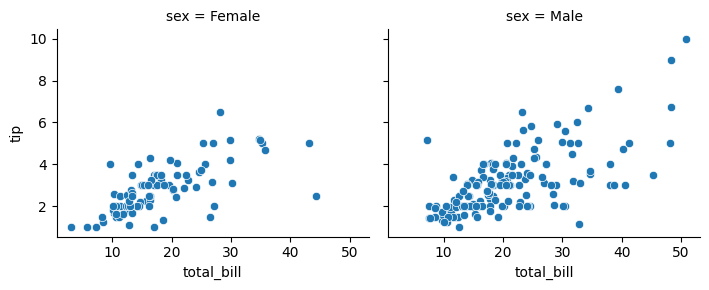

In [41]:
sns.relplot(df,x='total_bill',y='tip'
           ,col='sex',height =3 ,aspect=1.2)

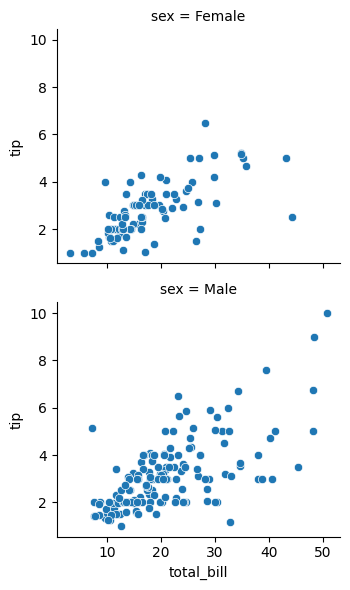

In [42]:
sns.relplot(df,x='total_bill',y='tip'
           ,row='sex',height =3 ,aspect=1.2)

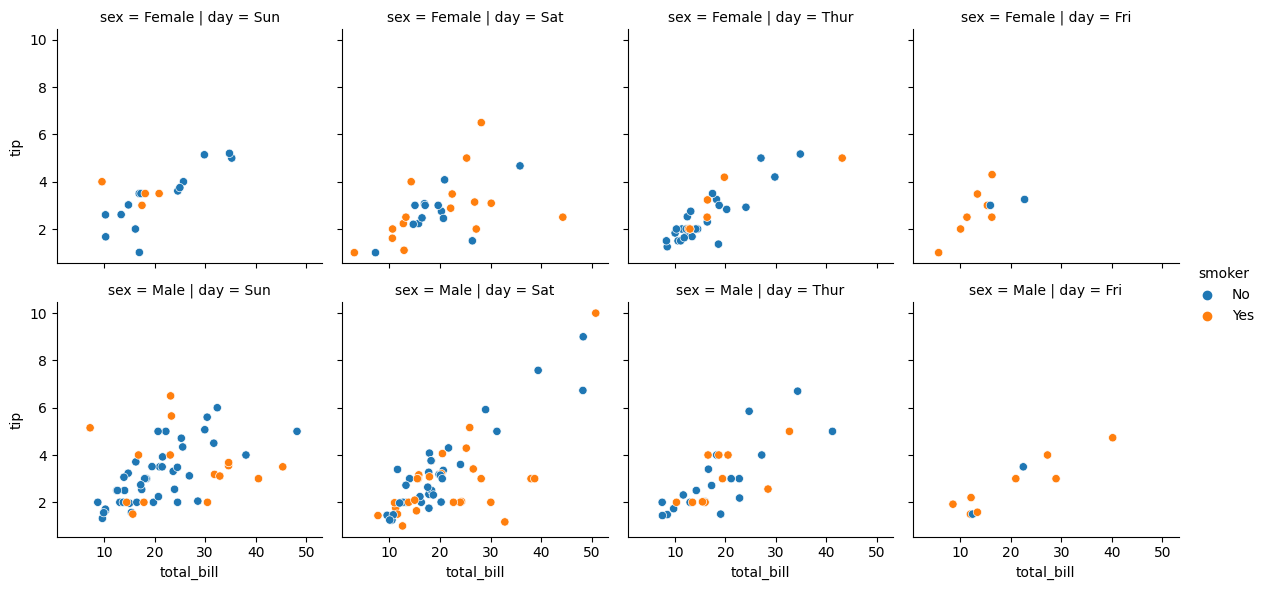

In [44]:
sns.relplot(df,x='total_bill',y='tip',
           row='sex',hue='smoker',col='day',height=3)

# Line chart

In [45]:
house_df = pd.read_csv("kc_house_data.csv")
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [46]:
house_df.date = pd.to_datetime(house_df.date)
house_df = house_df.set_index('date')
house_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,
2014-10-13,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2014-12-09,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2015-02-25,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2014-12-09,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2015-02-18,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
2015-02-23,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
2014-06-23,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [47]:
monthly_house_sale = house_df.resample('M').size().to_period().to_frame('count').reset_index() 
#to_period ในที่อาจารย์สอนมัน plot กราฟ ไม่ได้
monthly_house_sale

,date,count
0,2014-05,1768
1,2014-06,2180
2,2014-07,2211
3,2014-08,1940
4,2014-09,1774
5,2014-10,1878
6,2014-11,1411
7,2014-12,1471
8,2015-01,978
9,2015-02,1250


In [49]:
monthly_house_sale = house_df.resample('M').size().to_frame('count').reset_index()
monthly_house_sale

,date,count
0,2014-05-31,1768
1,2014-06-30,2180
2,2014-07-31,2211
3,2014-08-31,1940
4,2014-09-30,1774
5,2014-10-31,1878
6,2014-11-30,1411
7,2014-12-31,1471
8,2015-01-31,978
9,2015-02-28,1250


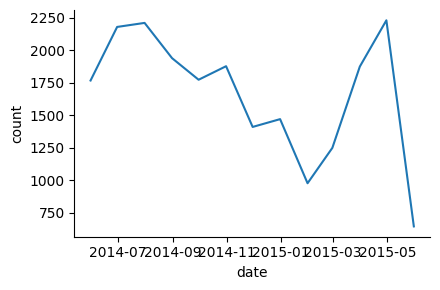

In [51]:
sns.relplot(monthly_house_sale,kind='line',y='count',x='date'
           ,height=3,aspect=1.5)

In [52]:
#ลองไปศึกษาการปรับให้แกน date เอียงข้อมูล เพื่อให้ดูง่ายขึ้น

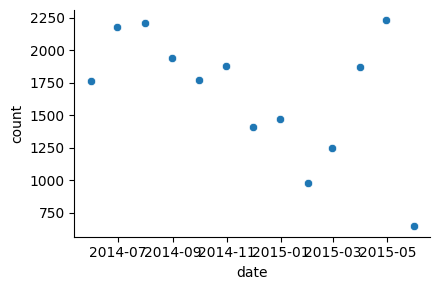

In [53]:
sns.relplot(monthly_house_sale,kind='scatter',y='count',x='date'
           ,height=3,aspect=1.5)

# catplot : การแสดงข้อมูลแยกตามประเภท
## catplot() 
    - hue
    - row
    - col 
    รูปแบบการแสดงผล (sns.catplot(data=df,x='...',y='...',kind=' ')
       - strip
       - box
       - violin 
       - swarm
       - bar : สรุปค่าเฉลี่ย
       - point: สรุปค่าเฉลี่ย


   ## การทำให้เป็น categorical และเรียงได้ตามที่ต้องการ
    df.day = pd.Categorical(df.day,categories=['Thur','Fri','Sat','Sun'],
                       ordered=True)

## Swarm

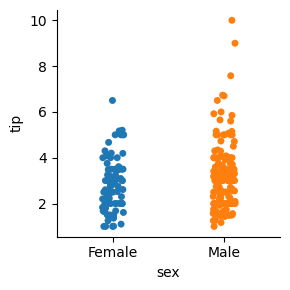

In [58]:
sns.catplot(df,x='sex',y='tip',height=3,hue='sex')

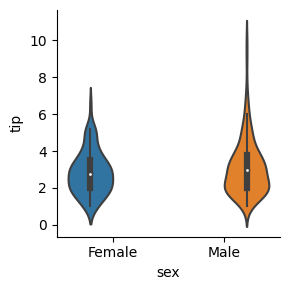

In [59]:
sns.catplot(df,x='sex',y='tip',height=3,hue='sex',kind='violin')

## Boxplot

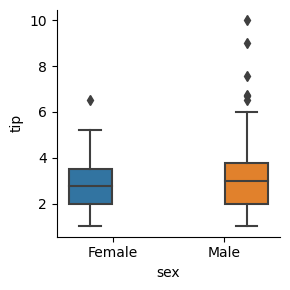

In [62]:
sns.catplot(df,x='sex',y='tip',height=3,hue='sex',kind='box')

## bar / point เป้นการค่าเฉลี่ย

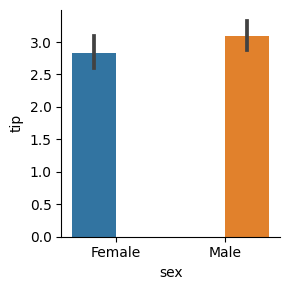

In [65]:
sns.catplot(df,x='sex',y='tip',height=3,hue='sex',kind='bar')

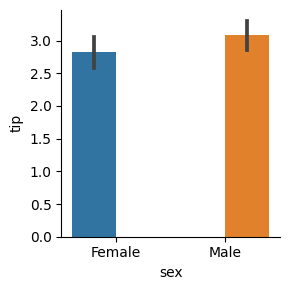

In [67]:
sns.catplot(df,x='sex',y='tip',
            height=3,hue='sex',kind='bar'#kind = 'bar'/'point'
           ,estimator ='mean')#หรือestimator = np.mean / sum /std

## size คือการนับ row ทั้งหมดไม่ว่าจะมีค่าหรือไม่มีค่า
## count จะนับค่าที่

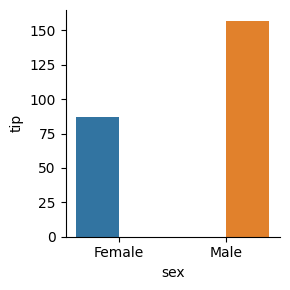

In [68]:
sns.catplot(df,x='sex',y='tip',
            height=3,hue='sex',kind='bar'
           ,estimator ='size')

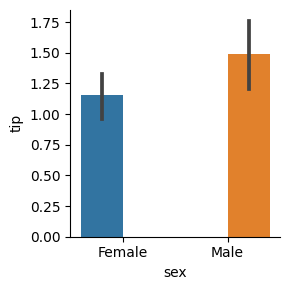

In [70]:
sns.catplot(df,x='sex',y='tip',
            height=3,hue='sex',kind='bar'
           ,estimator ='std')

## error bar ที่กว้างจะเกิดความผิดพลาดมากกว่า error bar ที่แคบ

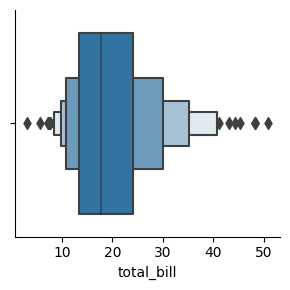

In [72]:
sns.catplot(df,x='total_bill',
            kind='boxen',height=3
           )

# Multi-plot for distplot()
    sns.diaplot(df.loc[df.time=='Lunch'].tip,label='Lunch')
    sns.distplot(df.loc[df.time=='Dinner'].tip,label='Dinner')
    plt.legend()

# การแสดงพล็อตหลายภาพ : FacetGrid
    

/Users/icelex/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/icelex/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/ice

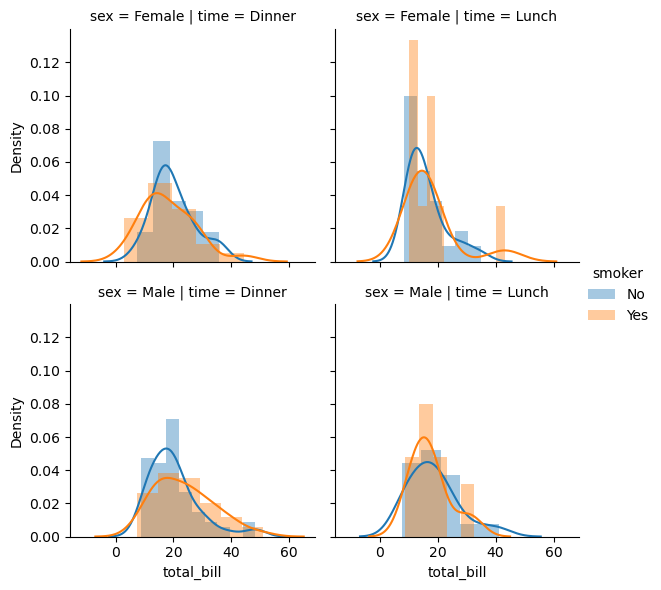

In [12]:
g = sns.FacetGrid(df,row='sex',col='time',hue='smoker')
g.map(sns.distplot,'total_bill')
g.add_legend()

# pairplot

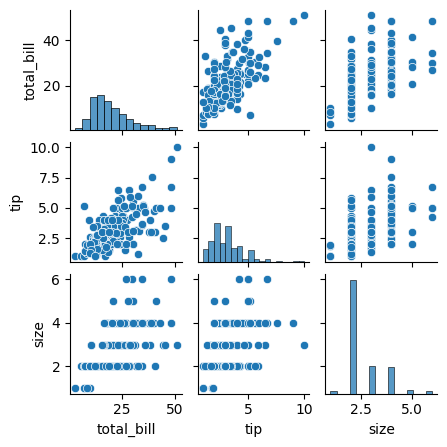

In [76]:
sns.pairplot(df,height=1.5)

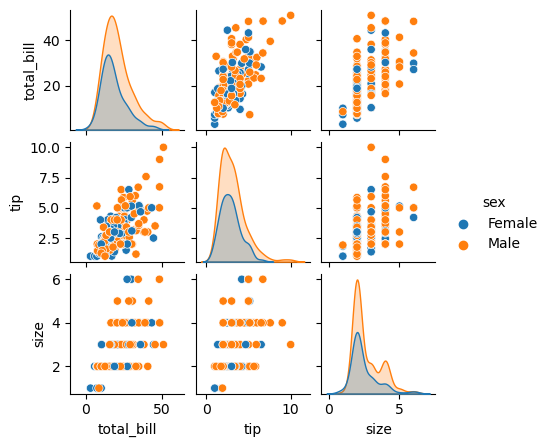

In [13]:
sns.pairplot(df,hue='sex',height=1.5)

## เอาคอลัมน์ที่เป็นตัวเลข เอามา plot คู่กัน


## pairgrid
    -map() เพื่อเลือกรูปแบบกราฟทั้งหมด
    -map_diag() เพื่อเลือกรูปแบบกราฟตำแหน่งทแยงมุม
    -map_offgrid() รูปแบบกราฟตำแหน่งเยื้องจากทแยงมุม
    -map_lower() รูปแบบกราฟตำแหน่งซ้ายล่างจากทแยงมุม
    -map_upper() รุปแบบกราฟตำแหน่งขวาบนเยื้องจากทะแยงมุม

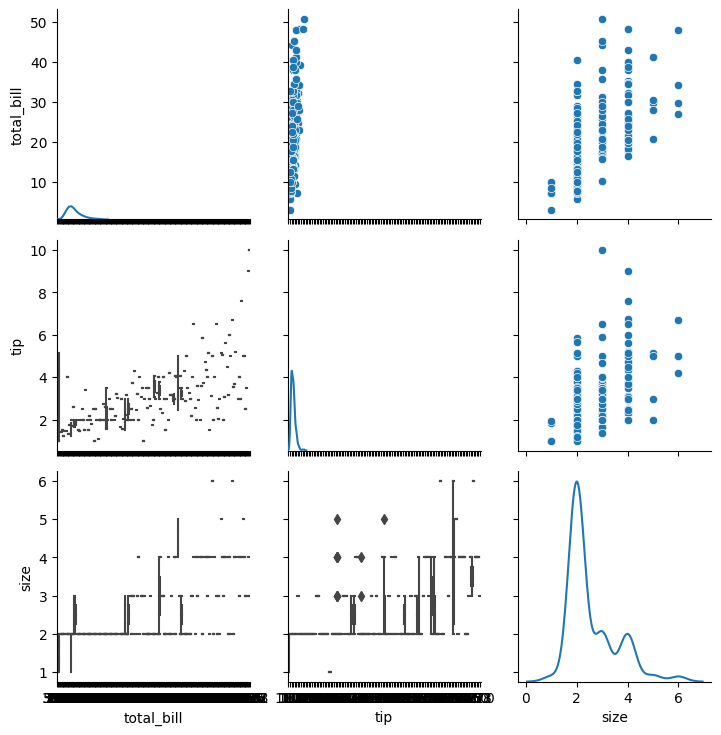

In [79]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot) #ทแยงมุม
g.map_upper(sns.scatterplot)
g.map_lower(sns.boxplot)


/Users/icelex/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/Users/icelex/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k,

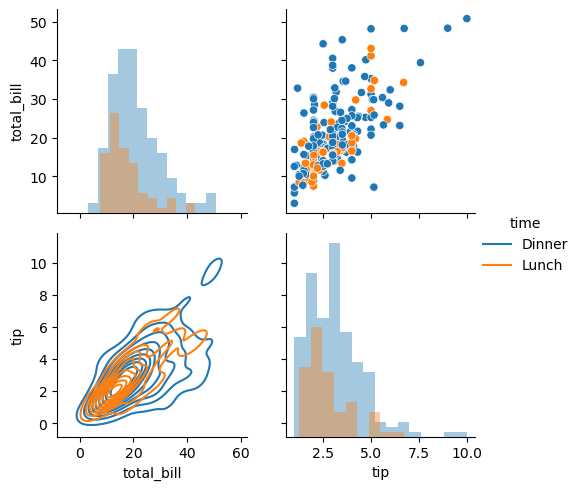

In [14]:
g = sns.PairGrid(df,hue='time',vars=['total_bill','tip'])#var = ระบุคอลัมน์ที่จะเอามา
g.map_diag(sns.distplot,kde=False) #ทแยงมุม
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.add_legend()

# การปรับแต่งรูป plot

    -seaborn ส่งคำสั่งไปต่อที่ matplotlib เพื่อปรับแต่งรูป
    -สิ่งที่ปรับแต่งได้คือ 1. รุปแบบเพื่อความสวยงาม (style) 2.ขนาดขององค์ประกอบ(context)
    -ใช้คำสั่ง set_style() ='daskgrid','whitegrid','dark','ticks'
    
    และ set_context()
        - paper
        -notebook
        -talk
        -poster

## style and Context

In [84]:
sns.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [85]:
sns.set_style('darkgrid')

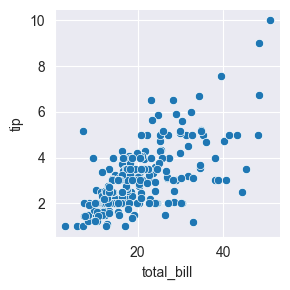

In [86]:
sns.relplot(df,x='total_bill',y='tip',height=3)

In [90]:
sns.set_context('paper')#paper/notebook/talk/poster

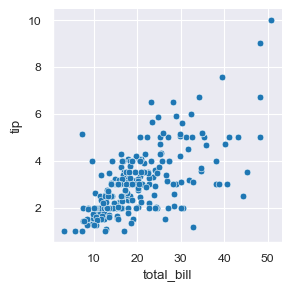

In [93]:
sns.relplot(df,x='total_bill',y='tip',height=3)